<a href="https://colab.research.google.com/github/Khai2708/Ai_application/blob/main/Week6_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [61]:
learning_parameter = 0.01
epochs = 300

In [62]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

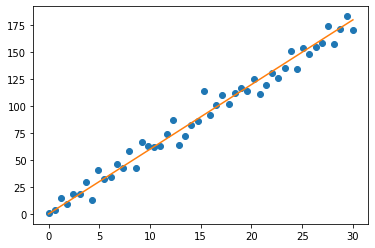

In [63]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, 6*x_train)
plt.show()

In [64]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')


In [65]:
#cREATE THE MODEL FOR REGRESSION
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize the variables
init = tf.global_variables_initializer()


Epochs 0.000000 Cost 0.005016 Weight 5.716899 Bias 0.111407
Epochs 40.000000 Cost 0.437732 Weight 5.905503 Bias 0.361193
Epochs 80.000000 Cost 0.433382 Weight 5.897263 Bias 0.575448
Epochs 120.000000 Cost 0.429463 Weight 5.889802 Bias 0.769462
Epochs 160.000000 Cost 0.425929 Weight 5.883044 Bias 0.945147
Epochs 200.000000 Cost 0.422744 Weight 5.876926 Bias 1.104234
Epochs 240.000000 Cost 0.419866 Weight 5.871386 Bias 1.248294
Epochs 280.000000 Cost 0.417272 Weight 5.866369 Bias 1.378741


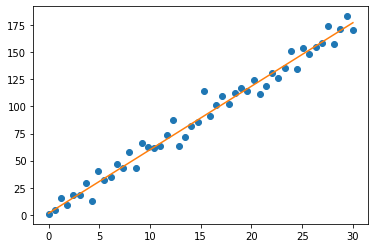

In [66]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [ ]:
# Create the model for regression
with tf.name_scope("Mode") as scope:
  prediction = W*X + B

  # Add summary to study behavuour of weights and biases with epochs
  weight_histogram = tf.summary.histogram("Weights", W)
  bias_histogram = tf.summary.histogram("Bias", B)

  # Cost function
  with tf.name_scope("Cost_function") as scope:
    cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

  # Record the scalar summary of the cost function
  cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [ ]:
# Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

  # Initialize the variables
  init = tf.global_variables_initializer()

  #Merge all the summaries into a single operator
  merged_summary = tf.summary.merge_all()

epochs 0.000000 Cost 0.949224 Weight 5.825156 Bias 1.539904
epochs 40.000000 Cost 0.148850 Weight 6.017102 Bias 1.666252
epochs 80.000000 Cost 0.150069 Weight 6.013157 Bias 1.768818
epochs 120.000000 Cost 0.151176 Weight 6.009585 Bias 1.861693
epochs 160.000000 Cost 0.152183 Weight 6.006351 Bias 1.945794
epochs 200.000000 Cost 0.153099 Weight 6.003422 Bias 2.021952
epochs 240.000000 Cost 0.153930 Weight 6.000770 Bias 2.090914
epochs 280.000000 Cost 0.154684 Weight 5.998368 Bias 2.153360


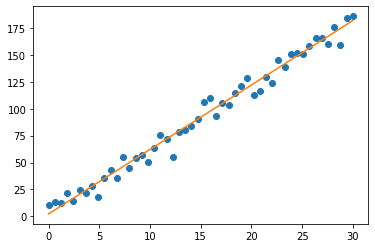

In [ ]:
# Define the tensorflow session 
with tf.Session() as sess: 
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X :x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X :x, Y : y})
      print('epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz

--2022-10-05 05:38:49--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8380303 (8.0M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-freebsd-amd64.tgz.1’

ngrok-v3-stable-fre 100%[===================>]   7.99M  27.7MB/s    in 0.3s    

2022-10-05 05:38:50 (27.7 MB/s) - ‘ngrok-v3-stable-freebsd-amd64.tgz.1’ saved [8380303/8380303]



In [ ]:
!unzip ngrok-v3-stable-linux-amd64.zip

unzip:  cannot find or open ngrok-v3-stable-linux-amd64.zip, ngrok-v3-stable-linux-amd64.zip.zip or ngrok-v3-stable-linux-amd64.zip.ZIP.


In [ ]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [ ]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [ ]:
# Network parameters of Neural Network
n_input = 784
n_hidden_1 = 512
n_hidden_2 = 256
n_hidden_3 = 128
n_output = 10

In [ ]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# Building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [ ]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [ ]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [ ]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0 , Train_loss = 28.310718536376953, Train_Accuracy 0.171875, Val_loss 28.310718536376953, Val_accuracy 0.171875
Iterations : 100 , Train_loss = 7.016016960144043, Train_Accuracy 0.4296875, Val_loss 7.016016960144043, Val_accuracy 0.4296875
Iterations : 200 , Train_loss = 4.712161064147949, Train_Accuracy 0.5859375, Val_loss 4.712161064147949, Val_accuracy 0.5859375
Iterations : 300 , Train_loss = 3.8079674243927, Train_Accuracy 0.65625, Val_loss 3.8079674243927, Val_accuracy 0.65625
Iterations : 400 , Train_loss = 3.4388952255249023, Train_Accuracy 0.6796875, Val_loss 3.4388952255249023, Val_accuracy 0.6796875
Iterations : 500 , Train_loss = 2.6121633052825928, Train_Accuracy 0.7421875, Val_loss 2.6121633052825928, Val_accuracy 0.7421875
Iterations : 600 , Train_loss = 2.4050984382629395, Train_Accuracy 0.7265625, Val_loss 2.4050984382629395, Val_accuracy 0.7265625
Iterations : 700 , Train_loss = 1.6963317394256592, Train_Accuracy 0.7890625, Val_loss 1.6963317394256592, V

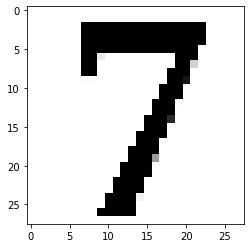

Prediction for test image is [2]


In [54]:
img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))